<a href="https://colab.research.google.com/github/sulthanfahmi/Regression-Discontinuity-Analysis-on-Bank-Debits/blob/main/Mini_Project_on_Bank_Debits_by_sulthan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression discontinuity: Banking Recovery**



In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
file_path = "/content/bank_data.csv"
data = pd.read_csv(file_path)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
data["recovery_strategy_numeric"] = label_encoder.fit_transform(data["recovery_strategy"])

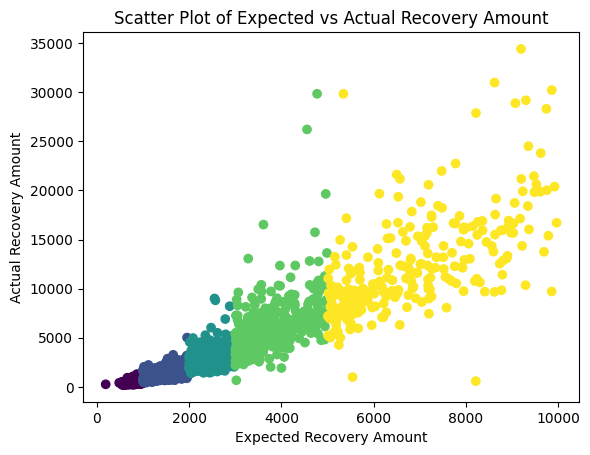

In [ ]:
# Plotting the data
plt.scatter(data["expected_recovery_amount"], data["actual_recovery_amount"], c=data["recovery_strategy_numeric"], cmap="viridis")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Scatter Plot of Expected vs Actual Recovery Amount")
plt.show()


In [ ]:
# Regression Discontinuity Analysis

threshold = 1000
data["Above_Threshold"] = data["expected_recovery_amount"] > threshold

In [ ]:
print(data.dtypes)

id                             int64
expected_recovery_amount       int64
actual_recovery_amount       float64
recovery_strategy             object
age                            int64
sex                           object
recovery_strategy_numeric      int64
Above_Threshold                 bool
dtype: object


In [ ]:
data["actual_recovery_amount"] = pd.to_numeric(data["actual_recovery_amount"])
data["Above_Threshold"] = pd.to_numeric(data["Above_Threshold"])

In [ ]:
print(data.isnull().sum())

id                           0
expected_recovery_amount     0
actual_recovery_amount       0
recovery_strategy            0
age                          0
sex                          0
recovery_strategy_numeric    0
Above_Threshold              0
dtype: int64


In [ ]:
import numpy as np

data["Above_Threshold"] = data["Above_Threshold"].astype(np.int64)

In [ ]:
# Fit regression model

model = sm.OLS(data["actual_recovery_amount"], sm.add_constant(data["Above_Threshold"])) # Ordinary Least Squares regression
results = model.fit()

# Print regression results

print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.087
Model:                                OLS   Adj. R-squared:                  0.087
Method:                     Least Squares   F-statistic:                     180.0
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):           2.87e-39
Time:                            08:54:11   Log-Likelihood:                -18447.
No. Observations:                    1882   AIC:                         3.690e+04
Df Residuals:                        1880   BIC:                         3.691e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

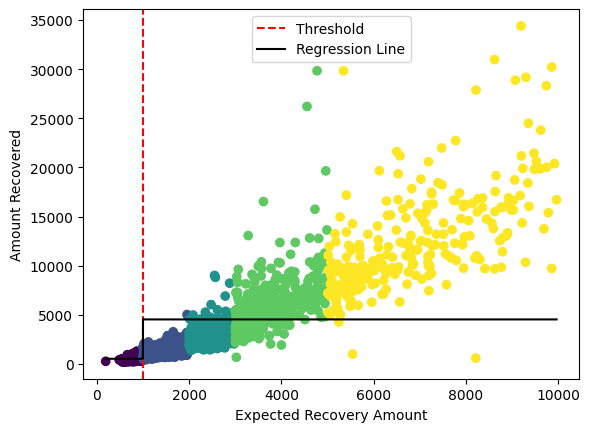

In [ ]:
# Visualize regression results

plt.scatter(data["expected_recovery_amount"], data["actual_recovery_amount"], c=data["recovery_strategy_numeric"], cmap="viridis")
plt.axvline(x=threshold, color="red", linestyle="--", label="Threshold")
plt.plot(data["expected_recovery_amount"], results.predict(), color="black", label="Regression Line")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Amount Recovered")
plt.legend()
plt.show()

**Graphical Exploratory Data Analysis**

In [ ]:
# Define the threshold

threshold = 1000

# Select data within the specified range

selected_data = data[(data["expected_recovery_amount"] >= 0) & (data["expected_recovery_amount"] <= 2000)]

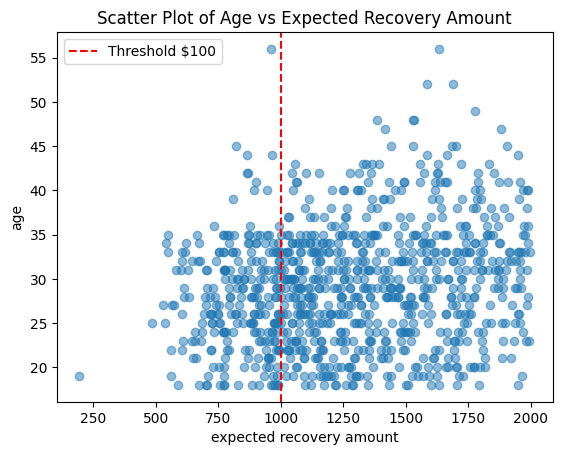

In [ ]:
# Scatter plot of age as a function of Expected Recovery Amount

plt.scatter(selected_data["expected_recovery_amount"], selected_data["age"], alpha=0.5)
plt.axvline(x=threshold, color="red", linestyle="--", label="Threshold $100")
plt.xlabel("expected recovery amount")
plt.ylabel("age")
plt.title("Scatter Plot of Age vs Expected Recovery Amount")
plt.legend()
plt.show()

**Statistical Test: age vs. expected recovery amount**

In [ ]:
# Define the threshold

threshold = 1000

# Select data within the specified range around the threshold

data_below_threshold = data[(data["expected_recovery_amount"] >= 900) & (data["expected_recovery_amount"] < threshold)]

data_above_threshold = data[(data["expected_recovery_amount"] > threshold) & (data["expected_recovery_amount"] <= 1100)]


In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test

statistic, p_value = kruskal(data_below_threshold["age"], data_above_threshold["age"])

# Print the results

print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"p-value: {p_value}")

Kruskal-Wallis Statistic: 3.1596647465950647
p-value: 0.07547868225791671


**Statistical test: sex vs. expected recovery amount**

In [ ]:
threshold = 1000

# Create a binary indicator for being above or below the threshold

data["Above_Threshold"] = (data["expected_recovery_amount"] > threshold).astype(int)

In [ ]:
# Select data within the specified range around the threshold

data_within_range = data[(data["expected_recovery_amount"] >= 900) & (data["expected_recovery_amount"] <= 1100)]

# Create a contingency table

contingency_table = pd.crosstab(data_within_range["Above_Threshold"], data_within_range["sex"])

In [ ]:
from scipy.stats import chi2_contingency


# Perform chi-squared test for independence

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)


print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant association between sex and being above or below the threshold")
else:
    print("Fail to reject the null hypothesis. Sex does not significantly differ around the threshold")

Chi-squared statistic: 0.49435761688866475
P-value: 0.48198988397369014
Fail to reject the null hypothesis. Sex does not significantly differ around the threshold


**Exploratory graphical analysis: Recovery Amount**

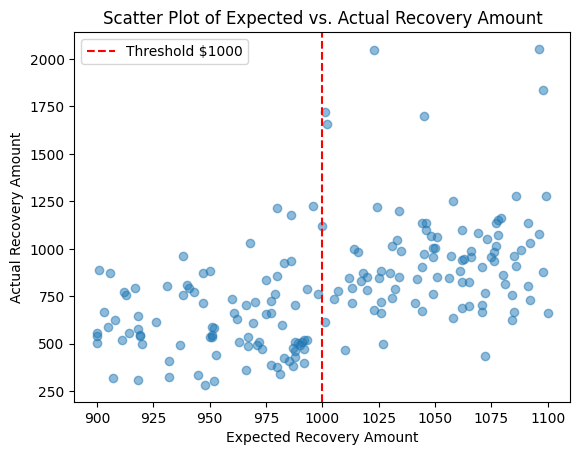

In [ ]:
threshold = 1000

# Select data within the specified range around the threshold

data_within_range = data[(data["expected_recovery_amount"] >= 900) & (data["expected_recovery_amount"] <= 1100)]

# Scatter plot of Expected Recovery Amount vs. Actual Recovery Amount

plt.scatter(data_within_range["expected_recovery_amount"], data_within_range["actual_recovery_amount"], alpha=0.5)
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot of Expected vs. Actual Recovery Amount')
plt.legend()
plt.show()

In [ ]:

data["Above_Threshold"] = (data["expected_recovery_amount"] > threshold).astype(int)

# Fit separate regression models below and above the threshold

model_below = sm.OLS(data[data["Above_Threshold"] == 0]["actual_recovery_amount"], sm.add_constant(data[data['Above_Threshold'] == 0]['expected_recovery_amount'])).fit()
model_above = sm.OLS(data[data["Above_Threshold"] == 1]["actual_recovery_amount"], sm.add_constant(data[data['Above_Threshold'] == 1]['expected_recovery_amount'])).fit()


print("Regression Model Below Threshold:")
print(model_below.summary())

print("\nRegression Model Above Threshold:")
print(model_above.summary())

Regression Model Below Threshold:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.196
Model:                                OLS   Adj. R-squared:                  0.193
Method:                     Least Squares   F-statistic:                     59.76
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):           2.76e-13
Time:                            08:54:12   Log-Likelihood:                -1638.5
No. Observations:                     247   AIC:                             3281.
Df Residuals:                         245   BIC:                             3288.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

**Statistical analysis: Recovery Amount**

In [ ]:
from scipy.stats import kruskal

# Define the thresholds for the two windows

window1_start, window1_end = 900, 1100
window2_start, window2_end = 950, 1050

# Select data within the specified windows

data_window1 = data[(data["expected_recovery_amount"] >= window1_start) & (data["expected_recovery_amount"] <= window1_end)]
data_window2 = data[(data["expected_recovery_amount"] >= window2_start) & (data["expected_recovery_amount"] <= window2_end)]

# Perform Kruskal-Wallis test

statistic1, p_value1 = kruskal(data_window1["actual_recovery_amount"], data_window1['Above_Threshold'])
statistic2, p_value2 = kruskal(data_window2["actual_recovery_amount"], data_window2['Above_Threshold'])

# Print the results

print(f"Kruskal-Wallis Test for Window 1 (Expected Recovery Amount $900-$1100):")
print(f"Statistic: {statistic1}")
print(f"P-value: {p_value1}")

print(f"\nKruskal-Wallis Test for Window 2 (Expected Recovery Amount $950-$1050):")
print(f"Statistic: {statistic2}")
print(f"P-value: {p_value2}")


Kruskal-Wallis Test for Window 1 (Expected Recovery Amount $900-$1100):
Statistic: 284.15935598957145
P-value: 9.315878333827725e-64

Kruskal-Wallis Test for Window 2 (Expected Recovery Amount $950-$1050):
Statistic: 154.21574705517668
P-value: 2.0776855708579777e-35


In [ ]:
alpha = 0.05
if p_value1 < alpha:
    print("Reject the null hypothesis for Window 1. There is evidence of a significant difference in actual recovery amount")
else:
    print("Fail to reject the null hypothesis for Window 1. Actual recovery amount does not significantly differ.")




Reject the null hypothesis for Window 1. There is evidence of a significant difference in actual recovery amount


In [ ]:
if p_value2 < alpha:
    print("Reject the null hypothesis for Window 2. There is evidence of a significant difference in actual recovery amount")
else:
    print("Fail to reject the null hypothesis for Window 2. Actual recovery amount does not significantly differ")

Reject the null hypothesis for Window 2. There is evidence of a significant difference in actual recovery amount


**Regression modeling: no threshold**

In [ ]:
import statsmodels.api as sm

# Model 1: Linear regression with only Expected Recovery Amount

model1 = sm.OLS(data["actual_recovery_amount"], sm.add_constant(data["expected_recovery_amount"])).fit()

# Print regression results for Model 1

print("Model 1 - Linear Regression:")
print(model1.summary())

# Model 2: Linear regression with Expected Recovery Amount and True Threshold indicator

model2 = sm.OLS(data["actual_recovery_amount"], sm.add_constant(data[["expected_recovery_amount", "Above_Threshold"]])).fit()

# Print regression results for Model 2

print("\nModel 2 - Linear Regression with True Threshold Indicator:")
print(model2.summary())


Model 1 - Linear Regression:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                            08:54:12   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

**Regression modeling: adding true threshold**

In [ ]:
import statsmodels.api as sm


# Model 1: Linear regression with only Expected Recovery Amount

model1 = sm.OLS(data["actual_recovery_amount"], sm.add_constant(data["expected_recovery_amount"])).fit()

# Print regression results for Model 1

print("Model 1 - Linear Regression:")
print(model1.summary())




Model 1 - Linear Regression:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                            08:54:12   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
# Model 2: Linear regression with Expected Recovery Amount and True Threshold indicator

model2 = sm.OLS(data["actual_recovery_amount"], sm.add_constant(data[["expected_recovery_amount", "Above_Threshold"]])).fit()

# Print regression results for Model 2

print("\nModel 2 - Linear Regression with True Threshold Indicator:")
print(model2.summary())


Model 2 - Linear Regression with True Threshold Indicator:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                            08:54:12   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

**Regression modeling: adjusting the window**

In [ ]:
import statsmodels.api as sm

# Define the narrower window

window_start, window_end = 950, 1050

# Select data within the specified window

data_window = data[(data["expected_recovery_amount"] >= window_start) & (data["expected_recovery_amount"] <= window_end)]

# Model 3: Linear regression with Expected Recovery Amount and True Threshold indicator for the narrower window

model3 = sm.OLS(data_window["actual_recovery_amount"], sm.add_constant(data_window[["expected_recovery_amount", 'Above_Threshold']])).fit()

# Print regression results for Model 3

print("\nModel 3 - Linear Regression with True Threshold Indicator (Narrower Window):")
print(model3.summary())



Model 3 - Linear Regression with True Threshold Indicator (Narrower Window):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Fri, 26 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            08:54:12   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]